NAMA: HIMAM BASHIRAN

NIM: 2311110055

KELAS: S1SD-04-01

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Load Data

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


# Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [5]:
#check missing values
def missing_value(df):
    missing_value = df.isnull().sum()
    total_cells = df.shape[0]
    missing_percentage = (missing_value/total_cells) * 100
    return pd.DataFrame({
        'Missing Values': missing_value,
        'Missing Percentage': missing_percentage
    })

missing_value(df)

,Missing Values,Missing Percentage
Pregnancies,77,10.026042
Glucose,115,14.973958
BloodPressure,154,20.052083
SkinThickness,38,4.947917
Insulin,192,25.000000
BMI,230,29.947917
DiabetesPedigreeFunction,77,10.026042
Age,154,20.052083
Outcome,0,0.000000


# Imputation with Mean, Median, Modus

In [6]:
df_mean = SimpleImputer(
        missing_values=np.nan,
        strategy='mean')

df_mean = pd.DataFrame(df_mean.fit_transform(df), columns=df.columns)

In [7]:
df_mean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1.0
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0.0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1.0
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0.0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1.0


In [9]:
df_median = SimpleImputer(
        missing_values=np.nan,
        strategy='median')

df_median = pd.DataFrame(df_median.fit_transform(df), columns=df.columns)

In [10]:
df_median.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df_median.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1.0
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0.0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1.0


In [12]:
df_modus = SimpleImputer(
        missing_values=np.nan,
        strategy='most_frequent')

df_modus = pd.DataFrame(df_modus.fit_transform(df), columns=df.columns)

In [13]:
df_modus.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df_modus.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,100.0,72.0,35.0,0.0,31.2,0.627,22.0,1.0
1,1.0,85.0,66.0,29.0,0.0,31.2,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,100.0,40.0,35.0,168.0,43.1,0.207,33.0,1.0


# Cek korelasi antar variabel dengan heatmap

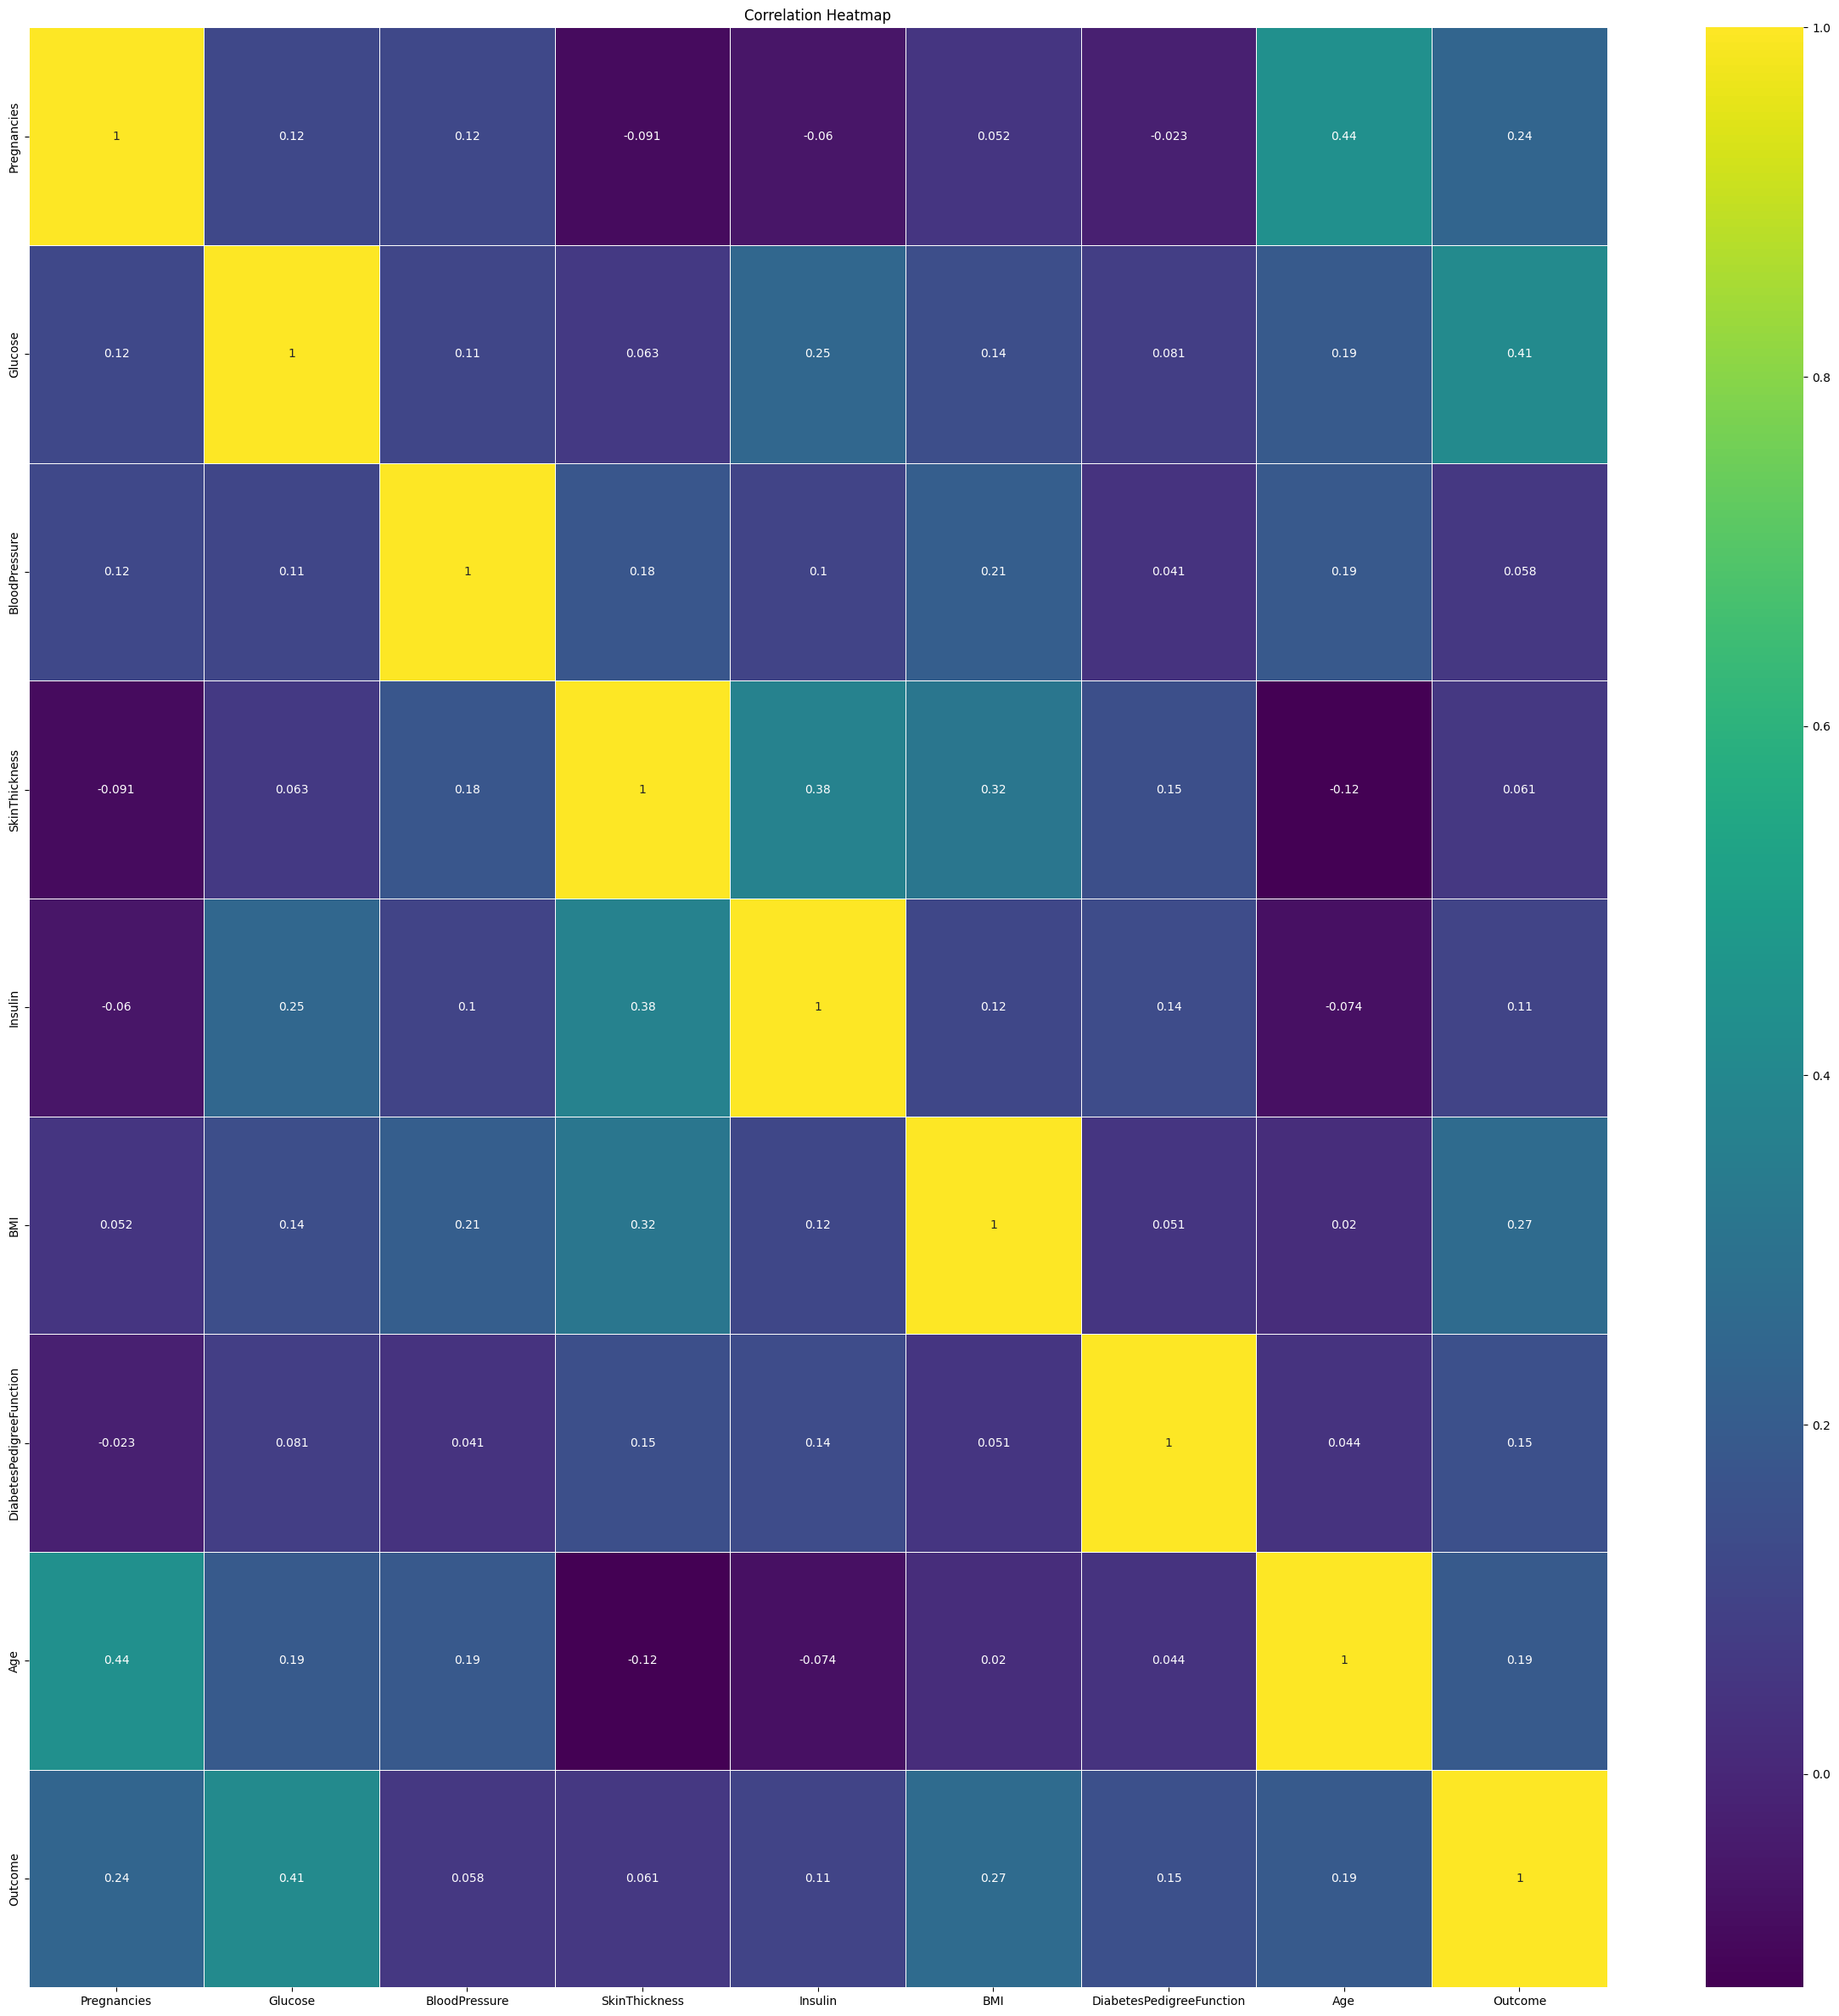

In [15]:
#correlation
plt.figure(figsize=(30, 30))
sns.heatmap(df_mean.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Lakukan imbalance handling dengan undersampling

## Data Splitting

In [16]:
# Memisahkan fitur (X) dan target (y) dari data yang sudah diimputasi
X = df_mean.drop(columns='Outcome')  # Fitur
y = df_mean['Outcome']  # Target

# Membagi data menjadi 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Undersampling with ENN (Edited Nearest Neighbors)

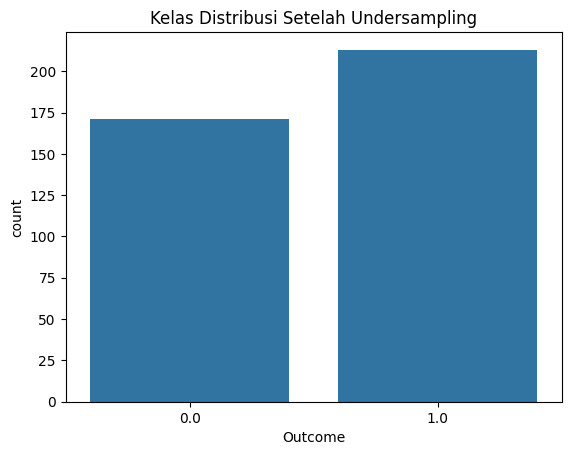

Jumlah data sebelum undersampling:
Outcome
0.0    401
1.0    213
Name: count, dtype: int64

Jumlah data setelah undersampling:
Outcome
1.0    213
0.0    171
Name: count, dtype: int64


In [17]:
enn = EditedNearestNeighbours()  # Enn undersampling
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

# Visualisasi distribusi kelas setelah undersampling
sns.countplot(x=y_resampled)
plt.title('Kelas Distribusi Setelah Undersampling')
plt.show()

# Melihat jumlah data sebelum undersampling
print("Jumlah data sebelum undersampling:")
print(y_train.value_counts())
print()

# Melihat jumlah data setelah undersampling
print("Jumlah data setelah undersampling:")
print(pd.Series(y_resampled).value_counts())

# Lakukan scaling dengan robust scaler dan minmax

In [18]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
                  'Outcome']

scaler_robust = RobustScaler()
robust_scaled_array = scaler_robust.fit_transform(df_mean[numeric_columns])
robust_scaled_df = pd.DataFrame(robust_scaled_array, columns=numeric_columns)

scaler_minmax = MinMaxScaler()
minmax_scaled_array = scaler_minmax.fit_transform(df_mean[numeric_columns])
minmax_scaled_df = pd.DataFrame(minmax_scaled_array, columns=numeric_columns)

In [19]:
def min_max_scale(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Melakukan Min-Max Scaling pada kolom numerik
for column in numeric_columns:
    df_mean[column] = min_max_scale(df_mean[column])

# Menampilkan beberapa baris pertama dari dataset yang telah di-scale
print("Data setelah Scaling with Min Max Scaling:\n", df_mean.head())

Data setelah Scaling with Min Max Scaling:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.605339       0.631579       0.353535  0.000000  0.476806   
1     0.058824  0.427136       0.578947       0.292929  0.000000  0.476806   
2     0.470588  0.919598       0.561404       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.578947       0.232323  0.138235  0.418778   
4     0.000000  0.605339       0.350877       0.353535  0.247059  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.243892  0.202769      1.0  
1                  0.121279  0.166667      0.0  
2                  0.263883  0.183333      1.0  
3                  0.039538  0.000000      0.0  
4                  0.172085  0.200000      1.0  


In [20]:
def robust_scale(column):
    median = column.median()
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return (column - median) / iqr

# Melakukan Robust Scaling pada kolom numerik
for column in numeric_columns:
    df_mean[column] = robust_scale(df_mean[column])

# Menampilkan beberapa baris pertama dari dataset yang telah di-scale
print("Data setelah Scaling with Robust Scaling:\n", df_mean.head())

Data setelah Scaling with Robust Scaling:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.549204  0.000000       0.233901        0.40625 -0.831119  0.000000   
1    -0.700796 -1.099612      -0.227637        0.21875 -0.831119  0.000000   
2     1.049204  1.939148      -0.381483       -0.68750 -0.831119 -1.879715   
3    -0.700796 -0.975581      -0.227637        0.03125  0.185098 -0.841877   
4    -0.950796  0.000000      -2.227637        0.40625  0.985098  2.401366   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.641312  0.000000      1.0  
1                 -0.181954 -0.180510      0.0  
2                  0.775541 -0.097177      1.0  
3                 -0.730798 -1.013844      0.0  
4                  0.159174 -0.013844      1.0  
